# Data import

In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Jedha_Fullstack/DataMatch_Project/Model/df_clean.csv')
df

,job_title,job_class,job_company,job_description,location,skills,salary,platform
0,Manager Data,Data Manager,CGI,"Manager data description de postechez cgi, lea...",France,"Excel,",45000.000000,HelloWork
1,Développeur Big Data,Data Architect,Inetum,"Nous sommes une esn agile, un groupe internati...",France,"Python, Sql, Spark, Java, Scala, Hadoop, Nosql...",45000.000000,HelloWork
2,Data Developer - Cdd,Développeur,Crédit Agricole Consumer Finance,"Crédit agricole consumer finance, filiale à 10...",Paris,"Python, Sql, R , Excel, , Sas, Vba, Sas",45000.000000,HelloWork
3,Responsable Bi Et Data,Data/BI Analyst,Timac AGRO France,Spécialiste de la production d'amendements de ...,France,"Sql, Tableau, Sas, Sas",45000.000000,HelloWork
4,Tech Lead Big Data,Data Architect,SG Services centraux,"Chez société générale, nous sommes convaincus ...",France,"Spark, Scala, Hadoop",45000.000000,HelloWork
...,...,...,...,...,...,...,...,...
8026,Data Manager Lead,Data Manager,Keyrus,Descriptif de poste nous recherchons un data ...,Neuilly-Sur-Seine,"Excel,",45221.142178,LinkedIn
8027,Ingénieur Data,Data Engineer,Mosica,"Véritable agent de carrière, mosica créée et m...",Poissy,"Python, Aws, Spark, Java, Scala, Hadoop, Kafka...",45221.142178,LinkedIn
8028,Stage - Bras Droit Co-Fondateur - Data & Opera...,Autres,Climb,L'entreprise : notre mission : permettre à...,Clichy,"Sql, Tableau, Excel,",45221.142178,LinkedIn
8029,Consultant Stratégie Cloud -,Data Architect,Thales,Qui etes-vous ? diplômé d’une grande école...,Courbevoie,NaN,45221.142178,LinkedIn


# Preprocessing job descriptions

In [5]:
job_class_list = df['job_class'].unique().tolist()
len(job_class_list)

16

In [6]:
df['job_company'] = df['job_company'].str.replace(r"\s+", " ")
company_names_list = df['job_company'].str.lower().apply(lambda x: x[:-1] if isinstance(x, str) else x).unique().tolist()

<ipython-input-6-95afad6f118d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['job_company'] = df['job_company'].str.replace(r"\s+", " ")


In [7]:
stop_words = job_class_list + company_names_list
len(stop_words)

2492

In [8]:
df['job_description_2'] = df['job_description'].str.lower()
df.head(3)

,job_title,job_class,job_company,job_description,location,skills,salary,platform,job_description_2
0,Manager Data,Data Manager,CGI,"Manager data description de postechez cgi, lea...",France,"Excel,",45000.0,HelloWork,"manager data description de postechez cgi, lea..."
1,Développeur Big Data,Data Architect,Inetum,"Nous sommes une esn agile, un groupe internati...",France,"Python, Sql, Spark, Java, Scala, Hadoop, Nosql...",45000.0,HelloWork,"nous sommes une esn agile, un groupe internati..."
2,Data Developer - Cdd,Développeur,Crédit Agricole Consumer Finance,"Crédit agricole consumer finance, filiale à 10...",Paris,"Python, Sql, R , Excel, , Sas, Vba, Sas",45000.0,HelloWork,"crédit agricole consumer finance, filiale à 10..."


In [9]:
#Choice to remove job titles and company names from the descriptions when they are mentioned so as not to reproduce
#the bias of the inappropriate job title with regard to the associated description, i.e. our starting premise
import re

pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, map(str, stop_words))))
df['job_description_2'] = df['job_description_2'].str.replace(pattern, '', regex=True)
df.head(3)

,job_title,job_class,job_company,job_description,location,skills,salary,platform,job_description_2
0,Manager Data,Data Manager,CGI,"Manager data description de postechez cgi, lea...",France,"Excel,",45000.0,HelloWork,"manager data description de postechez, leader ..."
1,Développeur Big Data,Data Architect,Inetum,"Nous sommes une esn agile, un groupe internati...",France,"Python, Sql, Spark, Java, Scala, Hadoop, Nosql...",45000.0,HelloWork,"nous sommes une esn agile, un groupe internati..."
2,Data Developer - Cdd,Développeur,Crédit Agricole Consumer Finance,"Crédit agricole consumer finance, filiale à 10...",Paris,"Python, Sql, R , Excel, , Sas, Vba, Sas",45000.0,HelloWork,", filiale à 100% du, est un acteur de référenc..."


In [10]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['clean_text'] = df['job_description_2'].astype(str).apply(remove_emoji)
df['clean_text'] = df['clean_text'].replace(r"[^a-zA-Z0-9\s]", " ")
df['clean_text'] = df['clean_text'].apply(lambda x: ''.join(elt for elt in x if elt.isalnum() or elt==" "))
df['clean_text'] = df['clean_text'].replace(r"\s+", " ")
df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())
df['clean_text'][:5]

0    manager data description de postechez leader m...
1    nous sommes une esn agile un groupe internatio...
2     filiale à 100 du est un acteur de référence s...
3    spécialiste de la production damendements de s...
4    chez nous sommes convaincus que vous êtes le m...
Name: clean_text, dtype: object

In [11]:
!pip install spacy -q

In [12]:
import spacy
import spacy.lang.fr
from spacy.lang.fr.stop_words import STOP_WORDS

In [13]:
!python -m spacy download fr_core_news_md -q

2023-07-26 16:14:27.763533: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 10.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')


In [14]:
import fr_core_news_md
nlp = spacy.load('fr_core_news_md')

#Tokenization

In [15]:
%%time

df['tokens'] = df['job_description_2'].apply(lambda x: [token.lemma_ for token in nlp(x) if token.text not in STOP_WORDS])

CPU times: user 14min 21s, sys: 2.68 s, total: 14min 24s
Wall time: 14min 49s


In [16]:
#Save tokenized descriptions so you don't have to repeat the time-consuming operation if you need to modify them later
#on data

df.to_csv('df_tkn.csv', index=False)

In [17]:
df['clean_text'] = df['tokens'].apply(lambda txt: ' '.join(txt).replace(",", ""))
df.head(3)

,job_title,job_class,job_company,job_description,location,skills,salary,platform,job_description_2,clean_text,tokens
0,Manager Data,Data Manager,CGI,"Manager data description de postechez cgi, lea...",France,"Excel,",45000.0,HelloWork,"manager data description de postechez, leader ...",manager dater description postechez leader mo...,"[manager, dater, description, postechez, ,, le..."
1,Développeur Big Data,Data Architect,Inetum,"Nous sommes une esn agile, un groupe internati...",France,"Python, Sql, Spark, Java, Scala, Hadoop, Nosql...",45000.0,HelloWork,"nous sommes une esn agile, un groupe internati...",être esn agile groupe international certifier...,"[être, esn, agile, ,, groupe, international, c..."
2,Data Developer - Cdd,Développeur,Crédit Agricole Consumer Finance,"Crédit agricole consumer finance, filiale à 10...",Paris,"Python, Sql, R , Excel, , Sas, Vba, Sas",45000.0,HelloWork,", filiale à 100% du, est un acteur de référenc...",filiale 100 pourcent acteur référence marché...,"[,, filiale, 100, pourcent, ,, acteur, référen..."


#Vectorization

In [18]:
#TF-IDF vectorization with deletion of words that are too common to all offers to allow relevant clustering

from sklearn.feature_extraction.text import TfidfVectorizer

irrelevant_words = ['être', 'métier', 'données', 'data', 'dater', 'poste', 'donnée', 'avoir', 'bon', 'dune', 'decathlon', 'leroy', 'sport', 'client', 'equipe',
                    'équipe', 'projet', 'dun', 'dune', 'sportif', 'produit', 'lille', 'digital', 'plaisir', 'large', 'envie', 'bienfait', 'software', 'choix',
                    'sup', 'letat', 'vinci', 'diplômant', 'school', 'niveau', 'bachelor', 'alternance', 'formation', 'lier', 'mission', 'service', 'expérience',
                    'travail', 'groupe']

vectorizer = TfidfVectorizer(stop_words=irrelevant_words)
X = df['clean_text']
vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)

In [19]:
X_tfidf.shape

(8031, 45950)

In [20]:
X_tfidf[0]

<1x45950 sparse matrix of type '<class 'numpy.float64'>'
	with 264 stored elements in Compressed Sparse Row format>

# KMeans clusterization

In [21]:
#Empirical determination of a 3-cluster optimum

from sklearn.cluster import KMeans

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [22]:
df['cluster'] = kmeans.labels_
df.head(3)

,job_title,job_class,job_company,job_description,location,skills,salary,platform,job_description_2,clean_text,tokens,cluster
0,Manager Data,Data Manager,CGI,"Manager data description de postechez cgi, lea...",France,"Excel,",45000.0,HelloWork,"manager data description de postechez, leader ...",manager dater description postechez leader mo...,"[manager, dater, description, postechez, ,, le...",2
1,Développeur Big Data,Data Architect,Inetum,"Nous sommes une esn agile, un groupe internati...",France,"Python, Sql, Spark, Java, Scala, Hadoop, Nosql...",45000.0,HelloWork,"nous sommes une esn agile, un groupe internati...",être esn agile groupe international certifier...,"[être, esn, agile, ,, groupe, international, c...",1
2,Data Developer - Cdd,Développeur,Crédit Agricole Consumer Finance,"Crédit agricole consumer finance, filiale à 10...",Paris,"Python, Sql, R , Excel, , Sas, Vba, Sas",45000.0,HelloWork,", filiale à 100% du, est un acteur de référenc...",filiale 100 pourcent acteur référence marché...,"[,, filiale, 100, pourcent, ,, acteur, référen...",0


# Analysis and visualizations of the clusters

In [23]:
df['cluster'].value_counts()

0    4411
1    2968
2     652
Name: cluster, dtype: int64

In [24]:
centroids = kmeans.cluster_centers_
centroids.shape

(3, 45950)

In [25]:
#Sorting indices by importance in order to then visualize the keywords by cluster

top_terms_indices = centroids.argsort()[:, ::-1]
top_terms_indices.shape

(3, 45950)

In [26]:
#Observations of the keywords discriminating each cluster

import numpy as np

terms = vectorizer.get_feature_names_out()
top_terms_per_cluster = [[terms[i] for i in cluster_indice] for cluster_indice in top_terms_indices]

top_terms = 10

cluster_keywords = []
for i, terms_cluster in enumerate(top_terms_per_cluster):
    top_terms_cluster = terms_cluster[:top_terms]
    cluster_keywords.append({"cluster": i, "offers_nb": np.count_nonzero(df['cluster'] == i)  , "keywords": ', '.join(top_terms_cluster)})

cluster_keywords

[{'cluster': 0,
  'offers_nb': 4411,
  'keywords': 'analyse, outil, marketing, entreprise, gestion, qualité, connaissance, commercial, sur, bac'},
 {'cluster': 1,
  'offers_nb': 2968,
  'keywords': 'technique, développement, solution, cloud, sur, compétence, environnement, architecture, entreprise, technologie'},
 {'cluster': 2,
  'offers_nb': 652,
  'keywords': 'conseil, cabinet, transformation, consultant, rejoindre, entreprise, grand, accompagner, comptable, technologie'}]

In [27]:
#Dimension reduction by TruncatedSVD to visualize job descriptions and resulting clusters in three dimensions

from sklearn.decomposition import TruncatedSVD
import plotly.graph_objects as go

svd = TruncatedSVD(n_components=3)
X_3d = svd.fit_transform(X_tfidf)

scatter3d_trace = go.Scatter3d(
    x=X_3d[:, 0],
    y=X_3d[:, 1],
    z=X_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=kmeans.labels_,
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(
            title='Clusters'
        )
    ),
    name='Cluster'
)

fig = go.Figure(data=[scatter3d_trace])
fig.update_layout(
    scene=dict(
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        zaxis_title='Dimension 3'
    ),
    title='Visualisation des clusters en 3D'
)

fig.show()

In [28]:
#Creation of "sub-dataframes" per cluster in order to be able to easily analyze each cluster afterwards

clusters_dic = {}

for i in range(n_clusters):
    clusters_dic[f'df_cluster_{i}'] = df.loc[df['cluster'] == i]

In [29]:
#Analysis of the composition of each cluster in terms of classes of job titles represented

clusters_dic['df_cluster_0']["job_class"].value_counts()[:10]

Data/BI Analyst              1216
Data Engineer                 522
Data Scientist                457
Consultant                    287
Product Owner/Manager         247
Pôle commercial/marketing     235
Data Manager                  233
Gestionnaire Data             232
Chef de projet                211
Autres                        204
Name: job_class, dtype: int64

In [30]:
clusters_dic['df_cluster_1']["job_class"].value_counts()[:10]

Data Engineer            1087
Développeur               636
Data Architect            359
Data/BI Analyst           310
Data Scientist            150
Product Owner/Manager      98
Consultant                 86
Data Manager               61
Business Analyst           55
Chef de projet             37
Name: job_class, dtype: int64

In [31]:
clusters_dic['df_cluster_2']["job_class"].value_counts()[:10]

Consultant               228
Pôle finance/HR           98
Data/BI Analyst           97
Data Architect            40
Data Scientist            38
Data Engineer             38
Data Manager              32
Développeur               22
Product Owner/Manager     19
Gestionnaire Data         11
Name: job_class, dtype: int64

In [32]:
#Analysis of the composition of each cluster in terms of the skills mentioned

all_skills_0 = clusters_dic['df_cluster_0']["skills"].str.cat(sep=' ')
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
skill_counts_0 = vectorizer.fit_transform([all_skills_0])
skills_0 = vectorizer.get_feature_names_out()
skill_freq_0 = skill_counts_0.sum(axis=0).A1
skill_freq_0_df = pd.DataFrame({'skill': skills_0, 'frequency': skill_freq_0})
top_skills_0 = skill_freq_0_df.sort_values(by='frequency', ascending=False)
top_skills_0['skill'] = top_skills_0['skill'].replace({"bi": "power bi", "power": "power bi"}) #regroupement de "power" et "bi" en un unique skill
top_skills_0['skill'] = top_skills_0['skill'].replace("unkwown", "unknown")
top_skills_0 = top_skills_0[top_skills_0['skill'] != 'git'] #suppression de "git" pour faciliter la visualisation
top_skills_0 = top_skills_0[~top_skills_0['skill'].duplicated()]
print(top_skills_0[:10])

         skill  frequency
10       excel       1673
42         sql       1285
31      python       1056
44     tableau        993
35         sas        850
28    power bi        563
7    dashboard        388
34         sap        340
29  powerpoint        250
46         vba        214


In [33]:
all_skills_1 = clusters_dic['df_cluster_1']["skills"].str.cat(sep=' ')
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
skill_counts_1 = vectorizer.fit_transform([all_skills_1])
skills_1 = vectorizer.get_feature_names_out()
skill_freq_1 = skill_counts_1.sum(axis=0).A1
skill_freq_1_df = pd.DataFrame({'skill': skills_1, 'frequency': skill_freq_1})
top_skills_1 = skill_freq_1_df.sort_values(by='frequency', ascending=False)
top_skills_1['skill'] = top_skills_1['skill'].replace({"bi": "power bi", "power": "power bi"})
top_skills_1['skill'] = top_skills_1['skill'].replace("unkwown", "unknown")
top_skills_1 = top_skills_1[~top_skills_1['skill'].duplicated()]
top_skills_1 = top_skills_1[top_skills_1['skill'] != 'git']
print(top_skills_1[:10])

         skill  frequency
42         sql       1607
31      python       1099
15        java        840
3        azure        628
2          aws        588
10       excel        559
41       spark        538
9       docker        534
18  kubernetes        433
36       scala        410


In [34]:
all_skills_2 = clusters_dic['df_cluster_2']["skills"].str.cat(sep=' ')
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
skill_counts_2 = vectorizer.fit_transform([all_skills_2])
skills_2 = vectorizer.get_feature_names_out()
skill_freq_2 = skill_counts_2.sum(axis=0).A1
skill_freq_2_df = pd.DataFrame({'skill': skills_2, 'frequency': skill_freq_2})
top_skills_2 = skill_freq_2_df.sort_values(by='frequency', ascending=False)
top_skills_2['skill'] = top_skills_2['skill'].replace({"bi": "power bi", "power": "power bi"})
top_skills_2['skill'] = top_skills_2['skill'].replace("unkwown", "unknown")
top_skills_2 = top_skills_2[~top_skills_2['skill'].duplicated()]
top_skills_2 = top_skills_2[top_skills_2['skill'] != 'git']
print(top_skills_2[:10])

       skill  frequency
10     excel        482
41   tableau        179
39       sql        152
29    python        122
3      azure         93
2        aws         89
11       gcp         79
4   power bi         76
38     spark         66
32       sas         58


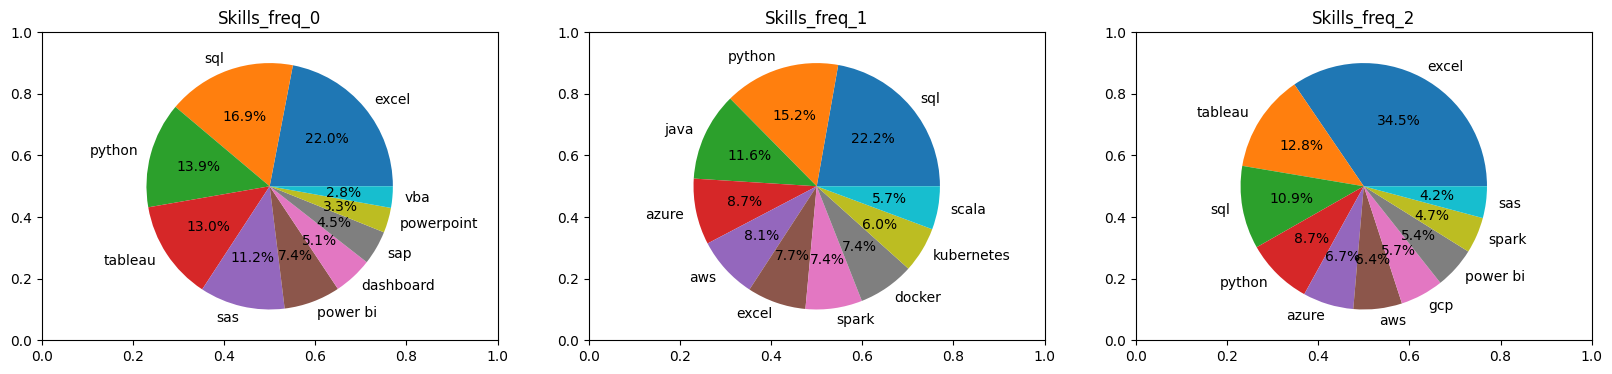

In [35]:
#Visualization of the distribution of skills mentioned by cluster

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax1.pie(top_skills_0['frequency'][:10], labels=top_skills_0['skill'][:10], autopct='%1.1f%%')
ax1.set_title('Skills_freq_0')

ax2 = fig.add_subplot(1, 3, 2)
ax2.pie(top_skills_1['frequency'][:10], labels=top_skills_1['skill'][:10], autopct='%1.1f%%')
ax2.set_title('Skills_freq_1')

ax3 = fig.add_subplot(1, 3, 3)
ax3.pie(top_skills_2['frequency'][:10], labels=top_skills_2['skill'][:10], autopct='%1.1f%%')
ax3.set_title('Skills_freq_2')

plt.show()

In [36]:
#Rename clusters after interpretation using keywords, composition in terms of job title classes and
#composition in terms of skills mentioned in the job description

cluster_names = {0 : "Engineering, Data Environment", 1 : "Data Analyse, Data Science", 2 : "Consulting"}

df['cluster'] = df['cluster'].map(cluster_names).fillna(df['cluster'])
df.head(3)

,job_title,job_class,job_company,job_description,location,skills,salary,platform,job_description_2,clean_text,tokens,cluster
0,Manager Data,Data Manager,CGI,"Manager data description de postechez cgi, lea...",France,"Excel,",45000.0,HelloWork,"manager data description de postechez, leader ...",manager dater description postechez leader mo...,"[manager, dater, description, postechez, ,, le...",Consulting
1,Développeur Big Data,Data Architect,Inetum,"Nous sommes une esn agile, un groupe internati...",France,"Python, Sql, Spark, Java, Scala, Hadoop, Nosql...",45000.0,HelloWork,"nous sommes une esn agile, un groupe internati...",être esn agile groupe international certifier...,"[être, esn, agile, ,, groupe, international, c...","Data Analyse, Data Science"
2,Data Developer - Cdd,Développeur,Crédit Agricole Consumer Finance,"Crédit agricole consumer finance, filiale à 10...",Paris,"Python, Sql, R , Excel, , Sas, Vba, Sas",45000.0,HelloWork,", filiale à 100% du, est un acteur de référenc...",filiale 100 pourcent acteur référence marché...,"[,, filiale, 100, pourcent, ,, acteur, référen...","Engineering, Data Environment"


#Wordclouds

In [37]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import STOPWORDS

In [38]:
#Created wordclouds representing each cluster for illustrative purposes in the final Streamlit application with words removed
#not adding value in the interpretation of each cluster

custom_stopwords_1 = ["groupe", "mise", "place", "l", "métier", "gestion", "technique", "activité", "client", "nouveau", "informatique", "développement", 'technologie',
                      "travailler", "sein", "participer", "développer", "mettre", "test", "connaissance", "outil", "collaborateur", "solution", "accompagner", "bac", "agile",
                      "rejoindre", "qualité", "python", "compétence", "fort", "faire", "profil", "cest", "rechercher"]

stopwords_1 = set(STOPWORDS.union(custom_stopwords_1))

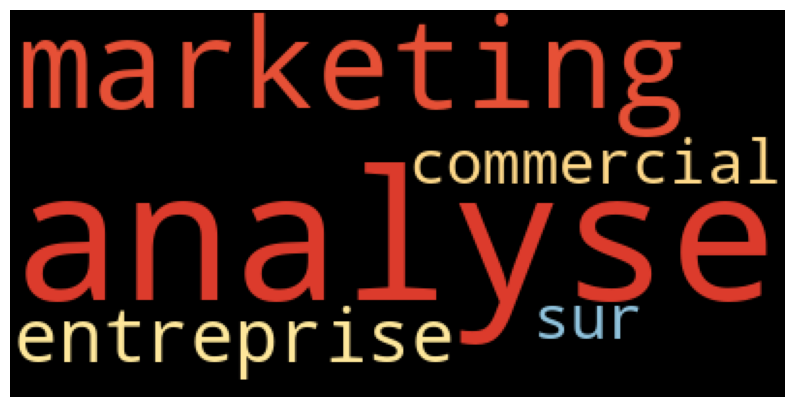

In [39]:
mask = None
colormap = 'RdYlBu'
min_font_size = 10
max_font_size = 100

wd_1 = wordcloud.WordCloud(background_color=None, contour_width=1, contour_color='steelblue', stopwords=stopwords_1, max_words=10, colormap=colormap, mask=mask,
                         min_font_size=min_font_size, max_font_size=max_font_size, prefer_horizontal=1)
cloud = wd_1.generate(cluster_keywords[0]['keywords'])
plt.figure(figsize = (10, 10))
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [40]:
#Saving wordclouds for later use in the Streamlit app

wd_1.to_file("wordcloud1.png")

In [41]:
custom_stopwords_2 = ["groupe", "mise", "place", "l", "métier", "gestion", "technique", "activité", "client", "nouveau", "informatique", "développement", 'technologie',
                      "travailler", "sein", "participer", "développer", "mettre", "test", "commercial", "qualité", "marketing"]

stopwords_2 = set(STOPWORDS.union(custom_stopwords_2))

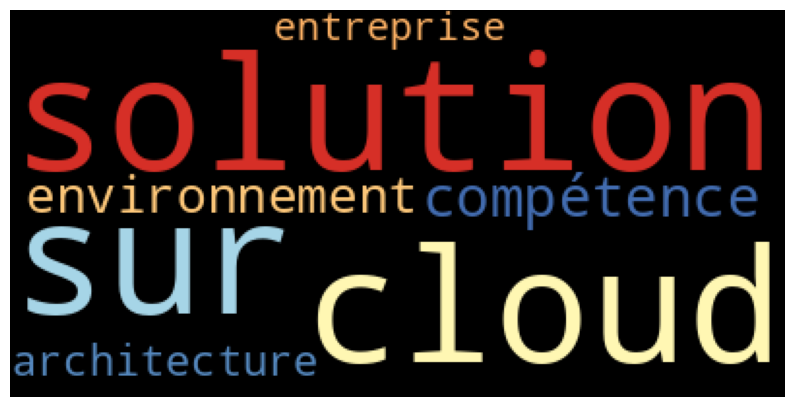

In [42]:
mask = None
colormap = 'RdYlBu'
min_font_size = 10
max_font_size = 100

wd_2 = wordcloud.WordCloud(background_color=None, contour_width=1, contour_color='steelblue', stopwords=stopwords_2, max_words=10, colormap=colormap, mask=mask,
                         min_font_size=min_font_size, max_font_size=max_font_size, prefer_horizontal=1)
cloud = wd_2.generate(cluster_keywords[1]['keywords'])
plt.figure(figsize = (10, 10))
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [43]:
wd_2.to_file("wordcloud2.png")

In [44]:
custom_stopwords_3 = ["groupe", "mise", "place", "l", "métier", "gestion", "technique", "activité", "client", "nouveau", "informatique", "développement", 'technologie',
                      "travailler", "sein", "participer", "développer", "mettre", "test", "commercial", "entreprise", "transformation", "grand", "rejoindre"]

stopwords_3 = set(STOPWORDS.union(custom_stopwords_3))

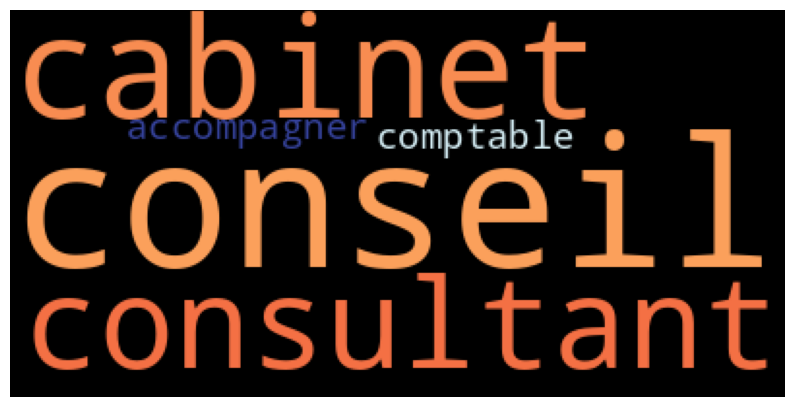

In [45]:
mask = None
colormap = 'RdYlBu'
min_font_size = 10
max_font_size = 100

wd_3 = wordcloud.WordCloud(background_color=None, contour_width=1, contour_color='steelblue', stopwords=stopwords_3, prefer_horizontal=1, max_words=10, colormap=colormap, mask=mask,
                         min_font_size=min_font_size, max_font_size=max_font_size)
cloud = wd_3.generate(cluster_keywords[2]['keywords'])
plt.figure(figsize = (10, 10))
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [46]:
wd_3.to_file("wordcloud3.png")